## Network Graph

In [41]:
import csv
import networkx as nx 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from seaborn import color_palette, set_style, palplot
plt.style.use('ggplot')
%matplotlib inline

In [22]:
## read pre-processed data from stata
df = pd.read_stata('data/0_CPIS_CDIS_BIS_USTIC_merged_fixed.dta')
keep_var = ['countrycode','counterpart_code','country','counterpart','CDIS_IAD','CPIS_IAP','loans_dep']
df_2015 = df[df['year']==2015][keep_var]
df_2015.fillna(0,inplace=True)
df_2015.loc[df['CDIS_IAD']<0,'CDIS_IAD'] = 0                       # recode all negative values to 0 
df_2015.loc[df['CPIS_IAP']<0,'CPIS_IAP'] = 0                       # recode negative values to 0 
## df_2015['log_CDIS_IAD'] = np.log(df_2015['CDIS_IAD'])        # Take log 
# Create a network with pandas dataframe 

df_2015 = df_2015[df_2015.CDIS_IAD>0]
G = nx.from_pandas_dataframe(df_2015, source="country", target="counterpart", edge_attr=['CDIS_IAD'],create_using=nx.DiGraph()) ##,'CPIS_IAP','loans_dep'

In [37]:
keep_country = [111,112,158,146,170,576,532,924]
df_test = df_2015[(df_2015.countrycode.isin(keep_country))&df_2015.counterpart_code.isin(keep_country)]
df_test.head()

,countrycode,counterpart_code,country,counterpart,CDIS_IAD,CPIS_IAP,loans_dep
167,112.0,111.0,United Kingdom,United States,439222.937500,9.681862e+05,940793.000000
877,576.0,111.0,Singapore,United States,34867.000000,2.675289e+05,0.000000
1502,924.0,111.0,"China, P.R.: Mainland",United States,25952.001953,1.111443e+05,0.000000
1583,158.0,111.0,Japan,United States,418515.750000,1.369423e+06,0.000000
1695,146.0,111.0,Switzerland,United States,264007.062500,2.721328e+05,30808.105469


In [38]:
G2 = nx.from_pandas_dataframe(df_test, source="country", target="counterpart", edge_attr=['CDIS_IAD'],create_using=nx.DiGraph()) ##,'CPIS_IAP','loans_dep'

/home/ubuntu/anaconda3/envs/py35/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/ubuntu/anaconda3/envs/py35/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/ubuntu/anaconda3/envs/py35/lib/python3.5/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/ubuntu/anaconda3/envs/py35/lib/python3.5/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be rem

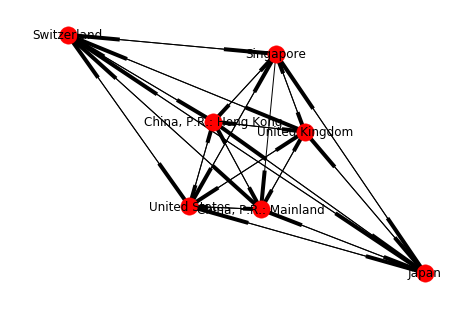

In [40]:
nx.draw(G2,with_labels=True)

/home/ubuntu/anaconda3/envs/py35/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


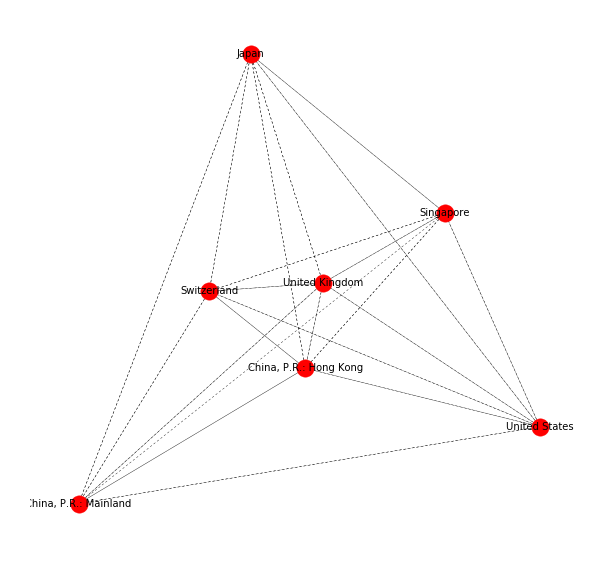

In [62]:
set_style('white')
plt.figure(figsize=(10,10))
plt.axis('off')
layout = nx.spring_layout(G2)
nx.draw_networkx_nodes(G2, layout, node_size=300)
nx.draw_networkx_labels(G2, pos=layout, font_size=10)
nx.draw_networkx_edges(G2, layout, width=.4,style='dotted',arrows=False)
plt.show()

In [63]:
nx.write_gexf(G2, "test.gexf")

/home/ubuntu/anaconda3/envs/py35/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


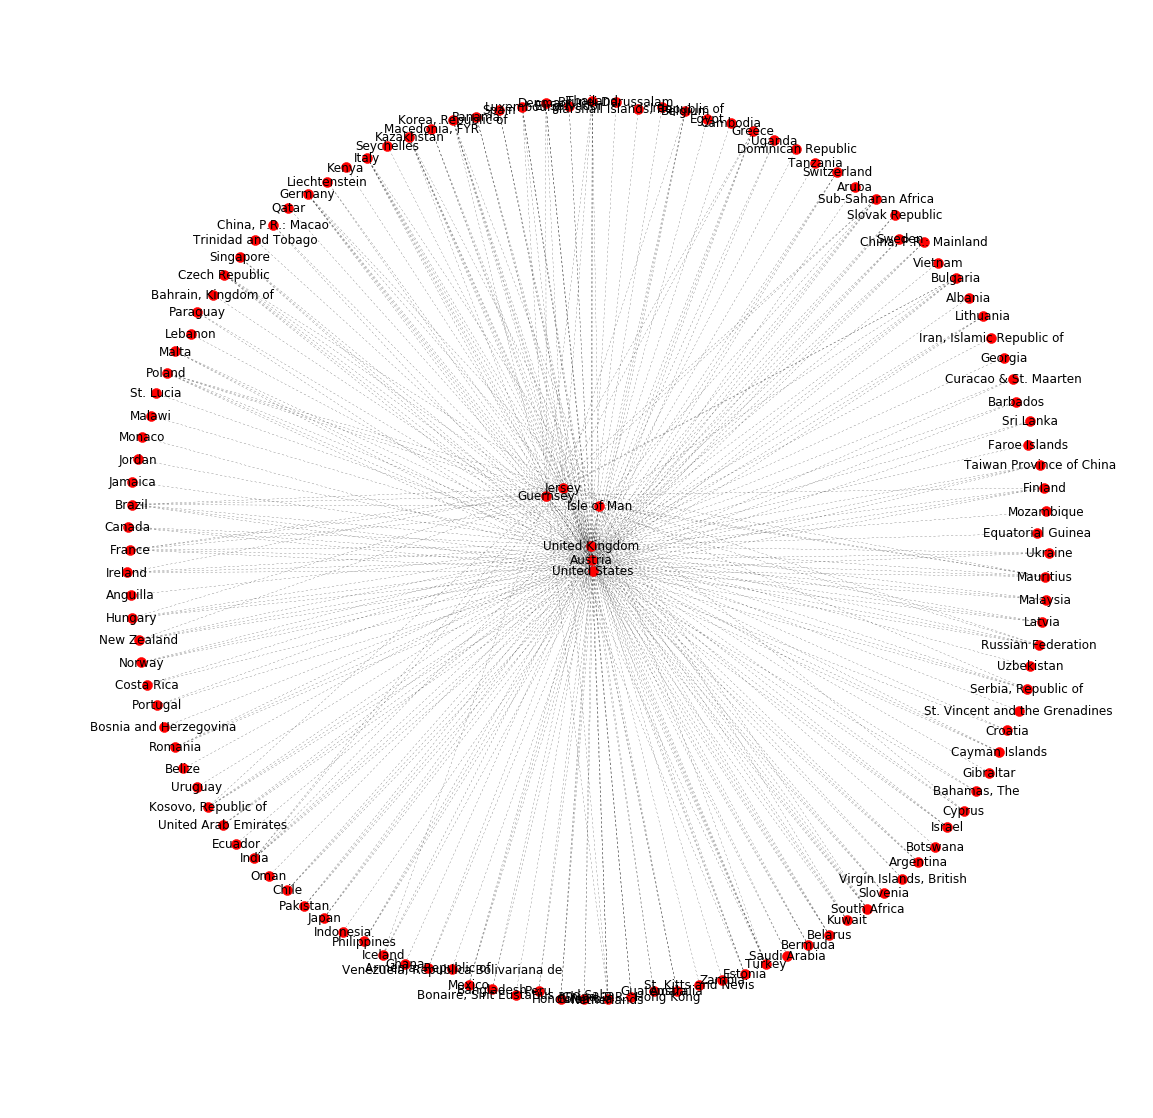

In [67]:
set_style('white')
plt.figure(figsize=(20,20))
plt.axis('off')
layout = nx.spring_layout(G)
nx.draw_networkx_nodes(G, layout, node_size=100)
nx.draw_networkx_labels(G, pos=layout, font_size=12)
nx.draw_networkx_edges(G, layout, width=.2,style='dotted',arrows=False)
plt.show()

In [68]:
nx.write_gexf(G, "test2.gexf")